In [4]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('results.csv')
print(df.describe())

               wpm          acc       rawWpm  consistency        mode2  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    166.844240    96.709510   175.305010    73.232630    95.687000   
std      33.107932     4.053107    33.671629    16.160359   681.149682   
min       9.200000    75.000000     9.200000     0.000000    10.000000   
25%     149.572500    94.620000   158.977500    61.475000    10.000000   
50%     169.620000    98.010000   179.915000    75.435000    10.000000   
75%     189.120000   100.000000   198.760000    86.710000    10.000000   
max     236.110000   100.000000   243.810000    99.750000  6963.000000   

       quoteLength  restartCount  testDuration  afkDuration  \
count  1000.000000   1000.000000    1000.00000  1000.000000   
mean     -0.984000      2.719000       6.12340     0.063000   
std       0.125538      3.657515       7.12736     0.619205   
min      -1.000000      0.000000       2.08000     0.000000   
25%      -1.000000

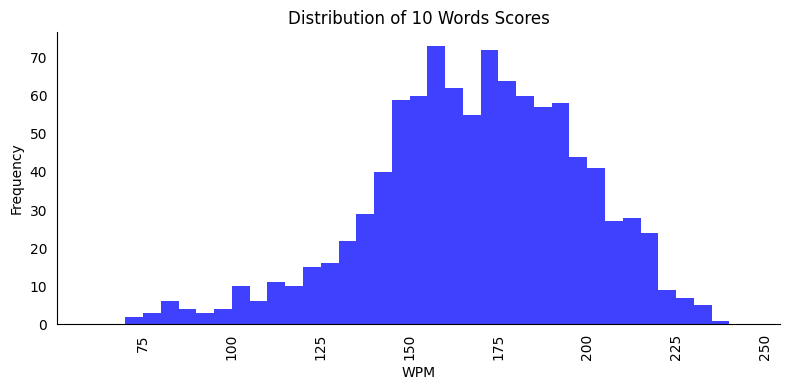

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['wpm'], bins=range(60, 250, 5), kde=False, color='blue', edgecolor=None)

plt.xticks(rotation=90)
plt.xlabel('WPM')
plt.ylabel('Frequency')
plt.title('Distribution of 10 Words Scores')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)
plt.tight_layout()

plt.show()


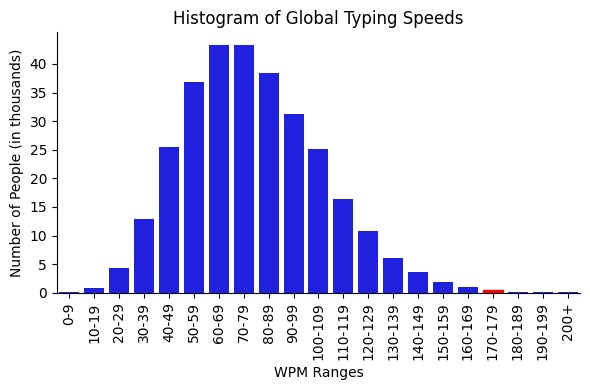

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

typing_speeds = {
    "0-9": 90,
    "10-19": 908,
    "20-29": 4377,
    "30-39": 12968,
    "40-49": 25469,
    "50-59": 36771,
    "60-69": 43325,
    "70-79": 43353,
    "80-89": 38453,
    "90-99": 31270,
    "100-109": 25063,
    "110-119": 16300,
    "120-129": 10718,
    "130-139": 6100,
    "140-149": 3576,
    "150-159": 1928,
    "160-169": 1006,
    "170-179": 479,
    "180-189": 213,
    "190-199": 119,
    "200+": 116
}

data = pd.DataFrame(list(typing_speeds.items()), columns=['WPM Range', 'Number of People'])

data['Number of People'] = data['Number of People'] / 1000

plt.figure(figsize=(6, 4))
sns.barplot(x='WPM Range', y='Number of People', data=data, color='blue')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=90)
plt.xlabel('WPM Ranges')
plt.ylabel('Number of People (in thousands)')
plt.title('Histogram of Global Typing Speeds')
plt.tight_layout()

plt.yticks(range(0, int(data['Number of People'].max()) + 1, 5))

plt.gca().get_children()[17].set_color('red')

plt.show()

In [7]:
data = pd.DataFrame(list(typing_speeds.items()), columns=['WPM Range', 'Number of People'])
data['Number of People'] = data['Number of People'] / 1000
data['Cumulative Number of People'] = data['Number of People'].cumsum()
data['Percentile'] = data['Cumulative Number of People'] / data['Number of People'].sum()
percentile = data[data['WPM Range'] == '170-179']['Percentile'].values[0]
print(f'I am better than {percentile:.2%}' + ' of people.')

I am better than 99.85% of people.


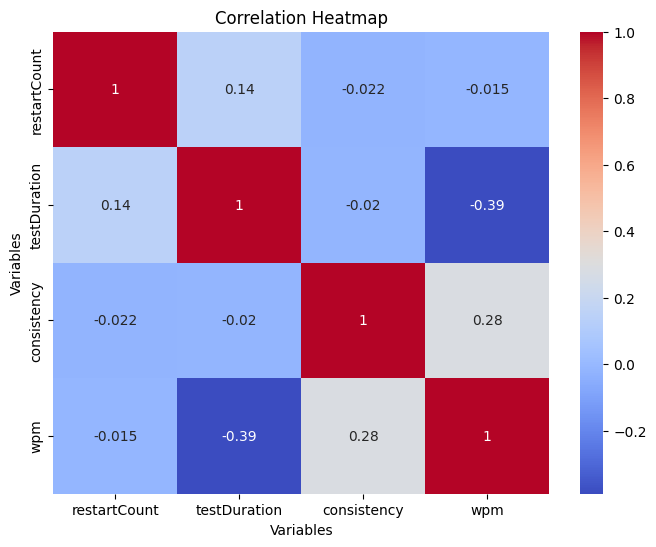

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe called 'df' with the variables you want to analyze

# Select the variables you want to include in the heatmap
variables = ['restartCount', 'testDuration', 'consistency', 'wpm']

# Calculate the correlation matrix
correlation_matrix = df[variables].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the heatmap
plt.show()

<Figure size 640x480 with 0 Axes>

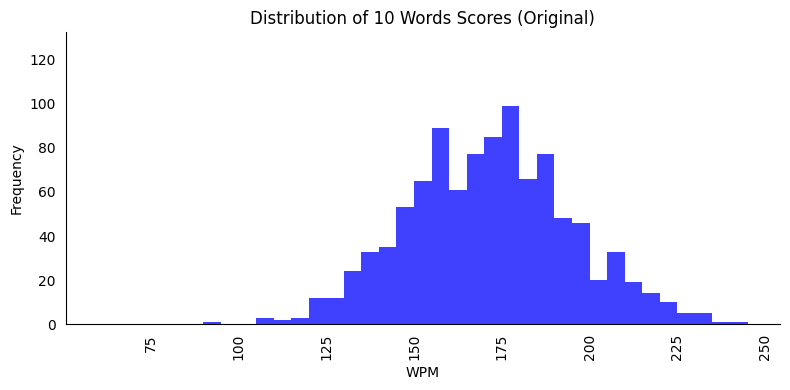

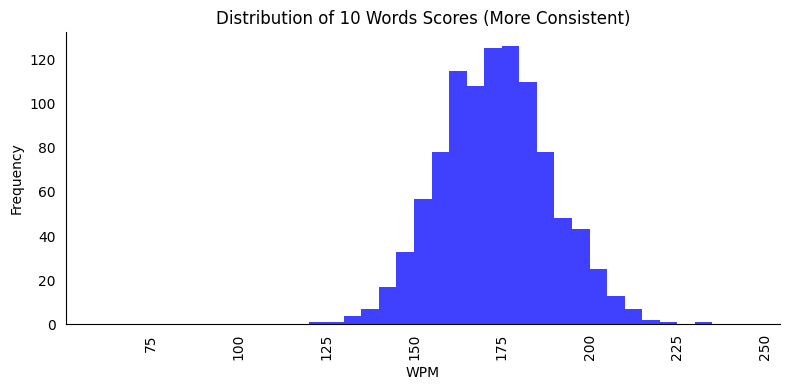

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Original data
np.random.seed(42)
original_data = np.random.normal(loc=171, scale=24, size=1000)  # Mean 120 WPM, standard deviation 30
df_original = pd.DataFrame({'wpm': original_data})

# More consistent data
np.random.seed(42)
consistent_data = np.random.normal(loc=173, scale=16, size=1000)  # Mean 120 WPM, standard deviation 10
df_consistent = pd.DataFrame({'wpm': consistent_data})

# Determine the maximum y value for consistency
y_max = max(
    sns.histplot(df_original['wpm'], bins=range(60, 250, 5), kde=False).get_ylim()[1],
    sns.histplot(df_consistent['wpm'], bins=range(60, 250, 5), kde=False).get_ylim()[1]
)
plt.clf()  # Clear the current plot

# Plot original distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_original['wpm'], bins=range(60, 250, 5), kde=False, color='blue', edgecolor=None)
plt.xticks(rotation=90)
plt.xlabel('WPM')
plt.ylabel('Frequency')
plt.title('Distribution of 10 Words Scores (Original)')
plt.ylim(0, y_max)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)
plt.tight_layout()
plt.show()

# Plot more consistent distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_consistent['wpm'], bins=range(60, 250, 5), kde=False, color='blue', edgecolor=None)
plt.xticks(rotation=90)
plt.xlabel('WPM')
plt.ylabel('Frequency')
plt.title('Distribution of 10 Words Scores (More Consistent)')
plt.ylim(0, y_max)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)
plt.tight_layout()
plt.show()

